

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

In [2]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
qqplot(GPU1, line='s')

<Figure size 640x480 with 1 Axes>

In [3]:
from scipy.stats import shapiro
stat, p = shapiro(GPU1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.854, p=0.020


In [4]:
from scipy.stats import ttest_ind
ttest = ttest_ind(GPU1, GPU2, equal_var=True)
ttest
#Answer: ## p <= alpha: reject H0, not equal variance.

Ttest_indResult(statistic=array([-2.62762951]), pvalue=array([0.01379428]))

[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [5]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [6]:
ttest = ttest_ind(GPU1, GPU3, equal_var=True)
ttest
Answer: ## p > alpha: fail to reject H0, equal variance.

SyntaxError: invalid syntax (<ipython-input-6-f9bea966df73>, line 3)

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [ ]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [ ]:
import statistics as stats

from scipy.stats import levene
levene(e1, e2, e3)

#No requirement of ANOVA testing

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [ ]:
# reject the Null Hypothesis when it is True. This is Type I Error

In [ ]:
#  do not reject (Accept) the Null Hypothesis when it is False. This is Type II Error 

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [ ]:
#The null hypothesis is that the population mean has not changed from its previous value of 4.5 minutes:H0: µ = 4.5

In [ ]:
# The alternative hypothesis is the opposite of the null hypothesis, the alternative hypothesis is that the population mean is not 4.5 minutes:H1: µ ≠ 4.5

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [24]:
from scipy.stats import binom
import numpy as np
n,p =10,0.7
k = [0, 1, 2, 3, 4, 5, 6, 7]
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01])

In [9]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

In [25]:
Iris_df = pd.read_csv("Iris.csv")

In [26]:
Random = Iris_df.sample(n=10)
Random

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
70,5.9,3.2,4.8,1.8,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
80,5.5,2.4,3.8,1.1,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [12]:
Iris_df.isnull().values.any()
#No missing Values

False

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [13]:
Iris_df.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [17]:
Iris_df.Class[Iris_df.Class == 'Iris-setosa'] = 0
Iris_df.Class[Iris_df.Class == 'Iris-versicolor'] = 1
Iris_df.Class[Iris_df.Class == 'Iris-virginica'] = 2
Iris_df.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [27]:
Iris_df.dtypes
Class = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2}
Iris_df.Class = [Class[item] for item in Iris_df.Class]
Iris_df

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [20]:
Iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,Numbers
0,5.1,3.5,1.4,0.2,NaN,NaN
1,4.9,3.0,1.4,0.2,NaN,NaN
2,4.7,3.2,1.3,0.2,NaN,NaN
3,4.6,3.1,1.5,0.2,NaN,NaN
4,5.0,3.6,1.4,0.2,NaN,NaN


## Question 4

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [28]:
Iris_df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 5

*Plot the scatter matrix for all the variables.*

In [29]:
%matplotlib inline 

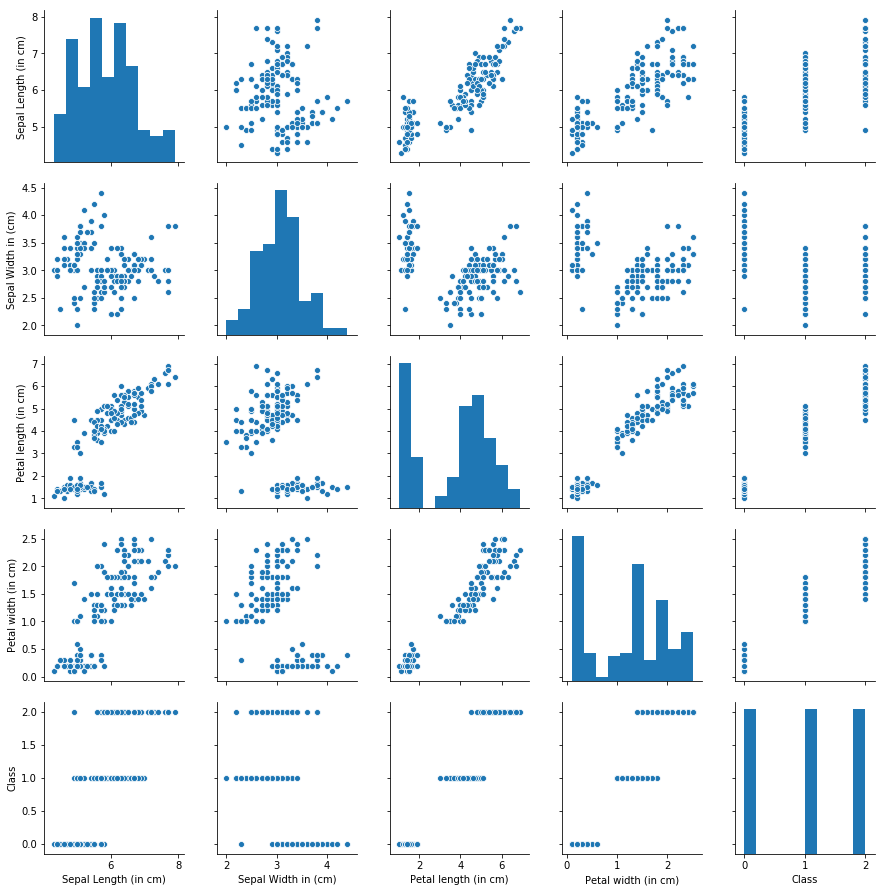

In [31]:
import seaborn as sns

sns.pairplot(Iris_df)

## Question 6 - Model

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

KeyError: "['Class'] not found in axis"

In [33]:
Iris_df.shape

(150, 4)

In [35]:
Iris_feature_df = Iris_df.drop(labels= "Class", axis = 1)
Iris_feature_df.head()

KeyError: "['Class'] not found in axis"

## Question 7 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 8

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*